# WHO national life expectancy - Modelization

## Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import dataset

In [2]:
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## Feature pre-selection based on EDA results

### Missing values pre-selection

In [4]:
miss_coeff = 0.8

In [5]:
df_missing = df.isna().sum() / df.shape[0]
df_prep = df[df.columns[df_missing < miss_coeff]]
df_prep.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN


### Columns pre-selection

In [6]:
health_dict = {
    'sanitary': ['basic_water'],
    'physical_shape': ['bmi', 'age5-19thinness', 'age5-19obesity'],
    'health_coverage': ['measles', 'polio', 'diphtheria'],
    'gov_investments': ['gghe-d', 'che_gdp']
}

In [8]:
mortality_cols = ['adult_mortality', 'infant_mort', 'age1-4mort']
std_life_cols = ['une_poverty', 'une_gni', 'gni_capita']
edu_cols = ['une_school', 'une_edu_spend']

health_cols = []
for k,v in health_dict.items():
    health_cols.extend(v)

geo_cols = ['region', 'country']
target = 'une_life'
cat_target = 'life_exp_cat'
enc_cols = geo_cols + [cat_target]

In [9]:
df_prep = df_prep[geo_cols + mortality_cols + std_life_cols + edu_cols + health_cols + [target]]
df_prep.head()

,region,country,adult_mortality,infant_mort,age1-4mort,une_poverty,une_gni,gni_capita,une_school,une_edu_spend,basic_water,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,gghe-d,che_gdp,une_life
0,Africa,Angola,383.5583,0.137985,0.025695,32.3,2530.0,2190.0,NaN,2.60753,41.14431,21.7,11.0,0.5,32.0,21.0,31.0,1.11099,1.90860,46.522
1,Africa,Angola,372.3876,0.133675,0.024500,NaN,2630.0,2290.0,NaN,NaN,42.25467,21.8,10.9,0.5,60.0,28.0,42.0,2.04631,4.48352,47.059
2,Africa,Angola,354.5147,0.128320,0.023260,NaN,3180.0,2690.0,NaN,NaN,43.37680,21.9,10.7,0.6,59.0,22.0,47.0,1.30863,3.32946,47.702
3,Africa,Angola,343.2169,0.122040,0.021925,NaN,3260.0,2820.0,NaN,NaN,44.36387,22.0,10.5,0.7,44.0,21.0,46.0,1.46560,3.54797,48.440
4,Africa,Angola,333.8711,0.115700,0.020545,NaN,3560.0,3080.0,NaN,NaN,45.35134,22.2,10.3,0.8,43.0,18.0,47.0,1.68663,3.96720,49.263


## Preprocessing

### Feature engineering : categorize target col

In [10]:
def categorize_target(life_exp: float) -> str:
    
    if life_exp < 50:
        return 'under 50'
    
    elif 50 <= life_exp <= 60:
        return '50-60'
    
    elif 60 < life_exp <= 70:
        return '60-70'
    
    elif 70 < life_exp <= 80:
        return '70-80'
    
    else:
        return 'above 80'

In [11]:
def feature_engineering(df_: pd.DataFrame) -> pd.DataFrame:
    df_[cat_target] = df_[target].apply(categorize_target)
    return df_.drop(target, axis=1)

### Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

def encoding(df_: pd.DataFrame, col: str) -> np.array:
    return encoder.fit_transform(df_[col])

### Imputation

In [16]:
def imputation(df_: pd.DataFrame) -> pd.DataFrame:
    df_ = df_.dropna(axis=0)
    return df_

### Main preprocessing

In [17]:
def preprocessing(df_: pd.DataFrame, encode_cols: list, target_col: str):
    
    df_ = feature_engineering(df_)
    
    for col in encode_cols:
        df_[col] = encoding(df_, col)
    
    df_ = imputation(df_)
    
    X = df_.drop(target_col, axis=1)
    y = df_[target_col]
    
    print(f'X shape {X.shape} | Y shape {y.shape}')
    print(f'{y.value_counts()}')
    
    return X, y
    

### Train-test

In [19]:
from sklearn.model_selection import train_test_split

In [18]:
rd_state = 1    # gives a better classes repartition between train/test
t_size = 0.2

In [27]:
train_set, test_set = train_test_split(df_prep, test_size=t_size, random_state=rd_state)

In [28]:
X_train, y_train = preprocessing(train_set, encode_cols=enc_cols, target_col=cat_target)

X shape (187, 19) | Y shape (187,)
2    120
3     43
1     19
0      5
Name: life_exp_cat, dtype: int64


In [29]:
X_test, y_test = preprocessing(test_set, encode_cols=enc_cols, target_col=cat_target)

X shape (44, 19) | Y shape (44,)
2    27
3    16
1     1
Name: life_exp_cat, dtype: int64


In [26]:
y_train.value_counts()

2    120
3     43
1     19
0      5
Name: life_exp_cat, dtype: int64

In [30]:
y_test.value_counts()

2    27
3    16
1     1
Name: life_exp_cat, dtype: int64

## Modelization from target categories (classification)

In [35]:
from sklearn.tree import DecisionTreeClassifier 

In [36]:
model = DecisionTreeClassifier(random_state=rd_state)

### Evaluation

In [33]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [34]:
def eval_model(model, X_train, y_train, X_test, y_test, cross_val=4):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, 
                                               y_train, cv=cross_val,
                                               scoring='f1',
                                               fit_params={'average': 'macro'})
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='Training score')
    plt.plot(N, val_score.mean(axis=1), label='Cross validation score')
    plt.legend()

[[ 0  1  0]
 [ 1 26  0]
 [ 0  3 13]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.87      0.96      0.91        27
           3       1.00      0.81      0.90        16

    accuracy                           0.89        44
   macro avg       0.62      0.59      0.60        44
weighted avg       0.90      0.89      0.89        44



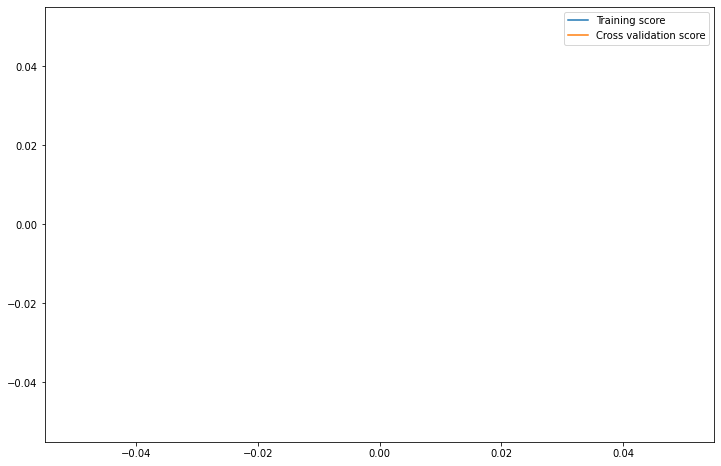

In [37]:
eval_model(model, X_train, y_train, X_test, y_test)

## Modelization from target (regression)